In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split

data = pd.read_excel('bonus/m06_bonus.xls')
data_np = data.to_numpy()

X, y = data_np[:,:10], data_np[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

def plot_importances(model, selected = None, coef=False, title=""):
    plt.figure(figsize=(6,2),dpi=150)
    y = model.coef_ if coef else model.feature_importances_
    N = 1+len(y)
    x = np.arange(1,N)

    plt.bar(x,y)

    if selected is not None:
        plt.bar(x[selected],y[selected],color="red",label="Selected Features")
        plt.legend()

    plt.xlabel("Feature")

    plt.ylabel("Coefficient" if coef else "Importance")
    plt.xlim(0,N)
    plt.title(title)
    plt.show()

## Plotting the raw training and test data

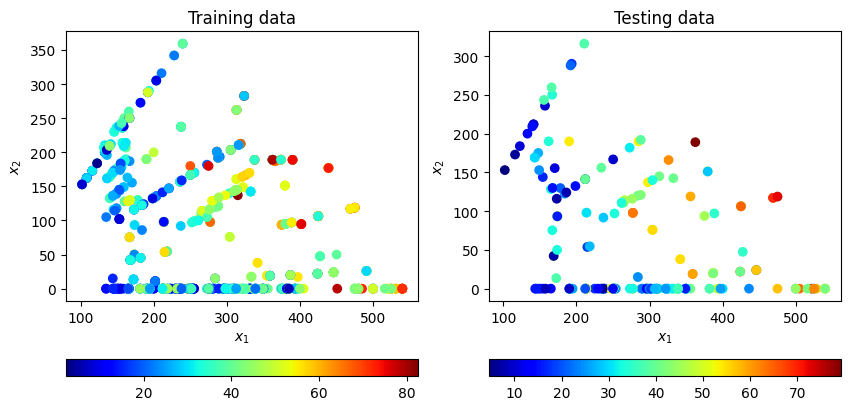

In [48]:
def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Constructing the pipeline with data preprocessing and model training, and a simple linear regression model

In [49]:
def log_transform(x):
    return np.log(x + 1.)
log_transform = FunctionTransformer(log_transform)
QF = QuantileTransformer(n_quantiles = X_train.shape[0])


pipeline = Pipeline([("log", log_transform), ("transform", QF), ("Linear Regression", LinearRegression())])
pipeline.fit(X_train, y_train)

LR_ = LinearRegression()
LR_.fit(X_train, y_train)

LinearRegression()

## Plotting the raw and processed test data to look for more opportunities of processing

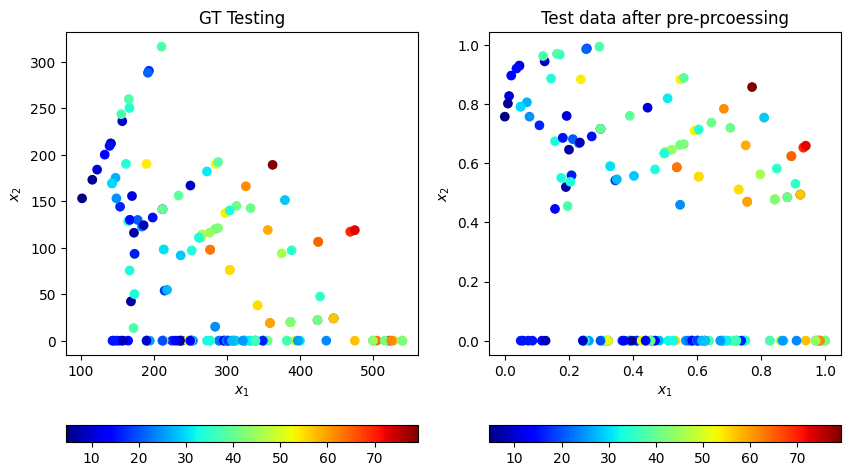

In [50]:
X_test_log_transformed = pipeline.named_steps['log'].transform(X_test)
X_test_processed = pipeline.named_steps['transform'].transform(X_test_log_transformed)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot(X_test, y_test, "GT Testing")

plt.subplot(1,2,2)
plot(X_test_processed, y_test, "Test data after pre-prcoessing")

## Investigating feature importances

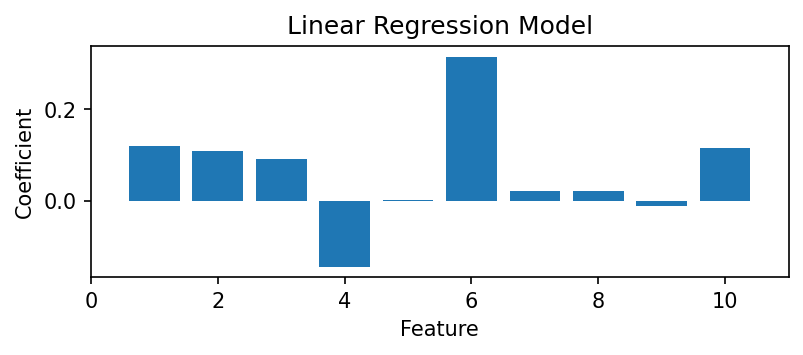

In [51]:
plot_importances(LR_, coef = True, title = "Linear Regression Model")

## Investigating the effects of removing less important features

In [52]:
X_train_transformed = pipeline.named_steps['log'].transform(X_train)
X_train_transformed = pipeline.named_steps['transform'].transform(X_train_transformed)

RFE_pipeline_ = RFE(pipeline.named_steps['Linear Regression'], n_features_to_select = 8)
RFE_pipeline_.fit(X_train_transformed, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

## Printing train and test data accuracy for simple linear regression, linear regression model with feature engineering, linear regression model with feature engineering and RFE

In [53]:
mse_train_LR_ = mean_squared_error(y_train, LR_.predict(X_train))
mse_test_LR_ = mean_squared_error(y_test, LR_.predict(X_test))

print("Train MSE for Linear Regression Model: ", mse_train_LR_)
print("Test MSE for Linear Regression Model: ", mse_test_LR_)

Train MSE for Linear Regression Model:  110.2933901504166
Test MSE for Linear Regression Model:  95.9503398969457


In [54]:
mse_train_LR_scaled_ = mean_squared_error(y_train, pipeline.predict(X_train))
mse_test_LR_scaled_ = mean_squared_error(y_test, pipeline.predict(X_test))

print("Train MSE for Linear Regression Model with scaled features: ", mse_train_LR_scaled_)
print("Test MSE for Linear Regression Model with scaled features: ", mse_test_LR_scaled_)

Train MSE for Linear Regression Model with scaled features:  53.452115554336736
Test MSE for Linear Regression Model with scaled features:  48.21842352448586


In [55]:
X_test_transformed = pipeline.named_steps['log'].transform(X_test)
X_test_transformed = pipeline.named_steps['transform'].transform(X_test_transformed)

mse_train_LR_scaled_rfe_ = mean_squared_error(y_train, RFE_pipeline_.predict(X_train_transformed))
mse_test_LR_scaled_rfe_ = mean_squared_error(y_test, RFE_pipeline_.predict(X_test_transformed))

print("Train MSE for Linear Regression Model with scaled features and RFE: ", mse_train_LR_scaled_rfe_)
print("Test MSE for Linear Regression Model with scaled features and RFE: ", mse_test_LR_scaled_rfe_)

Train MSE for Linear Regression Model with scaled features and RFE:  53.508276802406435
Test MSE for Linear Regression Model with scaled features and RFE:  48.348691842336954


## Conclusions
It can be seen that the test MSE after transforming and scaling the features is much lesser than before. However, removing less important features does not seem to have too much effect on the MSE values